<a href="https://colab.research.google.com/github/Nkbhapkar/EDA-on-playstore/blob/main/Capston_1_Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

**Exploratory data analysis on Playstore**

The main objective of this project is to deliver insights to understand customer demands better and thus help developers to popularize the product.Now a days playstore contain multiple apps but some are successfull and some of them are unsuccessfull.. This dataset contains details of different applications and reviews from different users.By exploring the data we have analyse the key factors which are responsible for app success.

Exporatory data analysis of playstore involves following steps
1. Loading the data into data frame
2. Cleaning the data
3. Extracting statistics from the dataset
4. Exploratory analysis and visualizations
5. Conclusion




first of all we have to mount drive where it contain dataset of playstore


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Import packages 

In [2]:
# Import the libraries for EDA project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline






**Data Preparation**

It is the process in which finding the missing values,cleaning and transforming raw data prior to processing and analysis. It is a crucial step before processing and sometimes involves reformatting data, making corrections to data and therefore the combining of knowledge sets to complement data.

Loading the dataset and Reading the csv file for further operation 


In [3]:
ps_df = pd.read_csv('/content/drive/MyDrive/Almabetter/Capston_1/Copy of Play Store Data.csv')
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


Checking Number of columns and rows in dataset

In [4]:
#checking the shape of dataset
ps_df.shape

(10841, 13)

In [5]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


cheking the different column name in dataset

In [6]:
ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
#checking the unique category in dataset
ps_df['Category'].unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION',
       '1.9'], dtype=object)

In [8]:
# total unique category
ps_df['Category'].nunique()

34

Finding the Null values in dataset 

In [9]:
#check null values in dataset
ps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [10]:
#checking total null values in dataset
ps_df.isnull().sum().sum()

1487

After checking the null values in datset there are the 1487 null values are founded.so that we have drop this null values.

In [12]:
#Drop the null values from datset
ps_df = ps_df.dropna()

In [13]:
ps_df.shape #after dropping the null values checking the shape of dataset

(9360, 13)

Checking again null values 

In [14]:
ps_df.isnull().sum().sum()

0

Total no of Apps in dataset

In [15]:
#Checking the number of different types of apps
ps_df['App'].nunique()

8190

Descriptive statistics 

In [16]:
ps_df.describe()

,Rating
count,9360.000000
mean,4.191838
std,0.515263
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,5.000000


In [17]:
ps_df.loc[3360]

App               CM Launcher 3D - Theme, Wallpapers, Efficient
Category                                        PERSONALIZATION
Rating                                                      4.6
Reviews                                                 6702776
Size                                                        17M
Installs                                           100,000,000+
Type                                                       Free
Price                                                         0
Content Rating                                             Teen
Genres                                          Personalization
Last Updated                                     August 3, 2018
Current Ver                                              5.41.0
Android Ver                                        4.0.3 and up
Name: 3360, dtype: object

In [18]:
ps_df['Price'] = pd.to_numeric(ps_df['Price'].str.replace('$',''))
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9360 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9360 non-null   object 
 1   Category        9360 non-null   object 
 2   Rating          9360 non-null   float64
 3   Reviews         9360 non-null   object 
 4   Size            9360 non-null   object 
 5   Installs        9360 non-null   object 
 6   Type            9360 non-null   object 
 7   Price           9360 non-null   float64
 8   Content Rating  9360 non-null   object 
 9   Genres          9360 non-null   object 
 10  Last Updated    9360 non-null   object 
 11  Current Ver     9360 non-null   object 
 12  Android Ver     9360 non-null   object 
dtypes: float64(2), object(11)
memory usage: 1.3+ MB


Now we can see which category contain how many no of apps


In [55]:
ps_df['Category'].value_counts()

FAMILY                 1717
GAME                   1074
TOOLS                   733
PRODUCTIVITY            334
FINANCE                 317
PERSONALIZATION         308
COMMUNICATION           307
LIFESTYLE               305
PHOTOGRAPHY             304
MEDICAL                 302
SPORTS                  286
BUSINESS                270
HEALTH_AND_FITNESS      262
SOCIAL                  244
NEWS_AND_MAGAZINES      214
TRAVEL_AND_LOCAL        205
SHOPPING                202
BOOKS_AND_REFERENCE     177
VIDEO_PLAYERS           160
DATING                  159
EDUCATION               129
MAPS_AND_NAVIGATION     124
ENTERTAINMENT           111
FOOD_AND_DRINK          106
WEATHER                  75
AUTO_AND_VEHICLES        73
HOUSE_AND_HOME           68
LIBRARIES_AND_DEMO       64
ART_AND_DESIGN           61
COMICS                   58
PARENTING                50
EVENTS                   45
BEAUTY                   42
Name: Category, dtype: int64

In [61]:
y = ps_df['Category'].value_counts().index
x = ps_df['Category'].value_counts()
xsis = []
ysis = []
for i in range(len(x)):
    xsis.append(x[i])
    ysis.append(y[i])

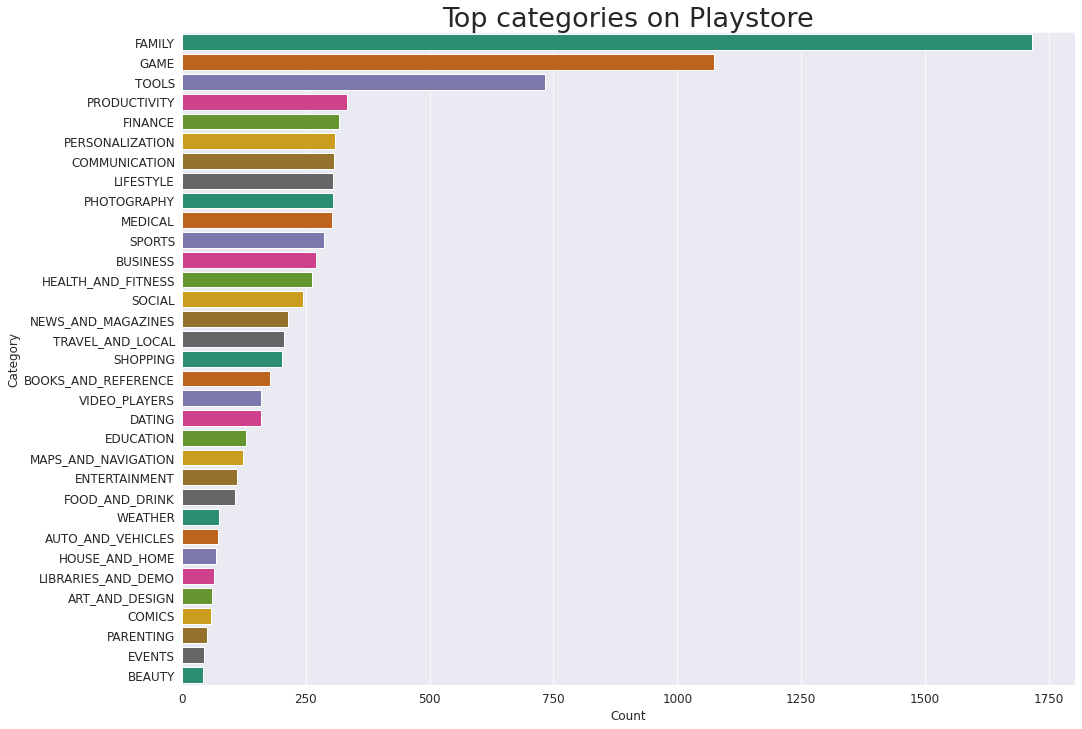

In [83]:
plt.figure(figsize=(16,12))
plt.xlabel("Count")
plt.ylabel("Category")

graph = sns.barplot(x = xsis, y = ysis, palette= "Dark2")
graph.set_title("Top categories on Playstore", fontsize = 27);

Now we have check if any app have duplicates

In [19]:
boolean = ps_df['App'].duplicated().any()
boolean

True

In [20]:
ps_df['App'].value_counts()

ROBLOX                                               9
CBS Sports App - Scores, News, Stats & Watch Live    8
Duolingo: Learn Languages Free                       7
Candy Crush Saga                                     7
ESPN                                                 7
                                                    ..
Kids Animals Jigsaw Puzzles 😄                        1
Call Blocker & Blacklist                             1
iOBD2-CF                                             1
DS router                                            1
Google Assistant Go                                  1
Name: App, Length: 8190, dtype: int64

As we can see from the above mentioned data, some of the apps are having multiple rows. Let's check out if there data is identical or not

In [21]:
ps_df[ps_df['App']=='ROBLOX']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
1653,ROBLOX,GAME,4.5,4447388,67M,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1701,ROBLOX,GAME,4.5,4447346,67M,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1748,ROBLOX,GAME,4.5,4448791,67M,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1841,ROBLOX,GAME,4.5,4449882,67M,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
1870,ROBLOX,GAME,4.5,4449910,67M,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2016,ROBLOX,FAMILY,4.5,4449910,67M,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2088,ROBLOX,FAMILY,4.5,4450855,67M,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
2206,ROBLOX,FAMILY,4.5,4450890,67M,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up
4527,ROBLOX,FAMILY,4.5,4443407,67M,"100,000,000+",Free,0.0,Everyone 10+,Adventure;Action & Adventure,"July 31, 2018",2.347.225742,4.1 and up


As we can see from the above dataframe, ROBLOX app is having identical rows with difference in number of reviews. It may have happened that for the same app, the data has been scraped in different points of time. So we have kept row of an app with maximum number of reviews, assuming it to be the latest one.

In [22]:
ps_df.drop_duplicates(inplace=True)

In [46]:
sns.set_style('dark')
plt.rcParams['font.size'] = 12
plt.rcParams['figure.figsize'] = (8, 4)
plt.rcParams['figure.facecolor'] = 'white'

In [47]:
top_genres = ps_df.Genres.value_counts().reset_index().rename(columns={'Genres':'Count','index':'Genres'})

In [48]:
genres_installs = ps_df.groupby(['Genres'])[['Installs']].sum()
top_genres_installs = pd.merge(top_genres, genres_installs, on='Genres')
top_20_genres_installs = top_genres_installs.head(20)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


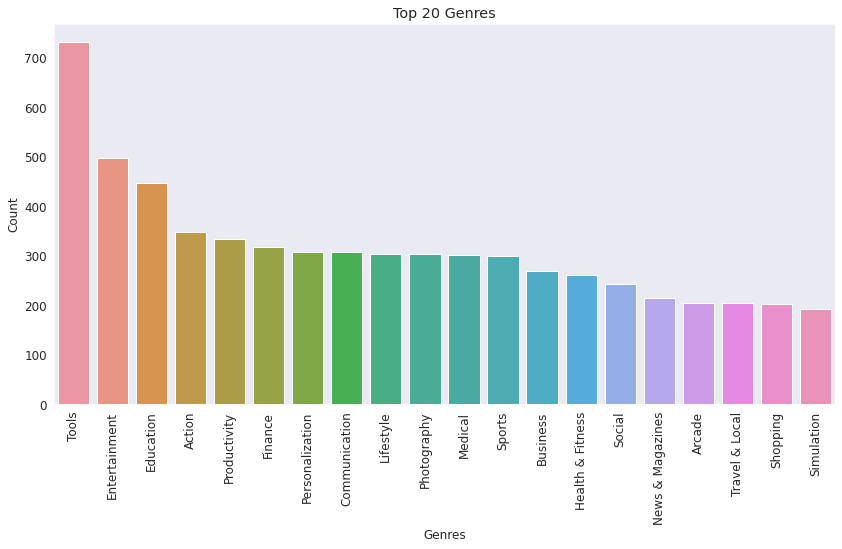

In [50]:
plt.figure(figsize=(14,7))
plt.xticks(rotation=90)
plt.xlabel("Genres")
plt.ylabel("Number of application")
plt.title("Top 20 Genres")
sns.barplot(top_20_genres_installs.Genres, top_20_genres_installs.Count)
plt.show()